In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df_ban=pd.read_csv('Bangalore.csv')
df_chen=pd.read_csv('Chennai.csv')
df_del=pd.read_csv('Delhi.csv')
df_hyd=pd.read_csv('Hyderabad.csv')
df_mum=pd.read_csv('Mumbai.csv')

In [3]:
l=[df_ban,df_chen,df_del,df_hyd,df_mum]
l1=["Bangalore", "Chennai", "Delhi", "Hyderabad", "Mumbai"]
for i in range (len(l)):
    print('The duplicate records of', l1[i], 'is', l[i].duplicated().sum())

The duplicate records of Bangalore is 0
The duplicate records of Chennai is 0
The duplicate records of Delhi is 0
The duplicate records of Hyderabad is 0
The duplicate records of Mumbai is 0


In [4]:
# No duplicate record is found, so new row count is same as original row count

In [5]:
l=[df_ban,df_chen,df_del,df_hyd,df_mum]
l1=["Bangalore", "Chennai", "Delhi", "Hyderabad", "Mumbai"]
for i in range (len(l)):
    print('The row count of', l1[i], 'is', l[i].shape[0])
    print('The column count of', l1[i], 'is', l[i].shape[1])

The row count of Bangalore is 1282
The column count of Bangalore is 11
The row count of Chennai is 548
The column count of Chennai is 11
The row count of Delhi is 1868
The column count of Delhi is 11
The row count of Hyderabad is 722
The column count of Hyderabad is 11
The row count of Mumbai is 648
The column count of Mumbai is 11


In [6]:
#Adding new column City 
l=[df_ban,df_chen,df_del,df_hyd,df_mum]
l1=["Bangalore", "Chennai", "Delhi", "Hyderabad", "Mumbai"]
for i in range (len(l)):
    l[i]['City']=l1[i]

In [7]:
df=pd.concat([df_ban,df_chen,df_del,df_hyd,df_mum])

In [8]:
df

,Unnamed: 0,Car Title,Car Model,Car Transmission,Car km,Car Owner,Car Fuel type,Car Registration,Car price per month,Car Price,Car Location,City
0,0,2017 Maruti Alto K10,VXI OPT,Manual,"20,229 km",2nd Owner,Petrol,KA-04,"6,823/month","3,49,000","Bellahalli, Bengaluru",Bangalore
1,1,2015 Maruti Wagon R 1.0,VXI,Manual,"70,067 km",2nd Owner,Petrol,KA-13,"7,194/month","3,68,000","Bellahalli, Bengaluru",Bangalore
2,2,2014 Maruti Alto K10,VXI P,Manual,"60,867 km",1st Owner,Petrol,KA-05,"6,139/month","3,14,000","Bellahalli, Bengaluru",Bangalore
3,3,2015 Maruti Baleno,ALPHA DIESEL 1.3,Manual,"84,473 km",3rd Owner,Diesel,KA-20,"10,538/month","5,39,000","Bellahalli, Bengaluru",Bangalore
4,4,2021 Mahindra Scorpio,S5,Manual,"29,793 km",1st Owner,Diesel,KA-03,"27,181/month","14,28,000","Bellahalli, Bengaluru",Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...
643,643,2018 Honda WR-V,1.2L I-VTEC VX MT,Manual,"27,023 km",3rd Owner,Petrol,MH-47,"12,141/month","6,21,000","Rupa Renaissance, Navi Mumbai",Mumbai
644,644,2018 Ford FREESTYLE,TREND PLUS 1.2 PETROL,Manual,"34,075 km",1st Owner,Petrol,MH-04,"11,320/month","5,79,000","Mulund, Mumbai",Mumbai
645,645,2015 Maruti Celerio,VXI,Manual,"29,535 km",1st Owner,Petrol,MH-01,"7,253/month","3,71,000","Mulund, Mumbai",Mumbai
646,646,2021 Hyundai NEW I20,ASTA (O) 1.2 MT,Manual,"17,708 km",1st Owner,Petrol,MH-06,"16,236/month","8,53,000","Mulund, Mumbai",Mumbai


#  2) FILE/COLUMN PARSING

In [9]:
# Derive new variables from existing variables. 

In [10]:
Car_brand=df['Car Title'].str.split(' ').str[1]
df['Car_brand']=Car_brand

In [11]:
Model_year=df['Car Title'].str[:4]
df['Model_year']=Model_year

In [12]:
Ownership_count=df['Car Owner'].str[:1]
df['Ownership_count']=Ownership_count

In [13]:
EMI_Rs=df['Car price per month'].str.split('/').str[0]
df['EMI Rs']=EMI_Rs

In [14]:
# Renaming the variables

In [15]:
df.rename(columns={'Car km':'Driven_km','Car Transmission':
                   'Gear_type','Car Fuel type':'Fuel type',
                   'Car Registration':
                   'Reg_place','Car Price':'Price'}
          ,inplace=True)

# 3) CREATE ANALYSIS DATA SET

In [16]:
#Removing original columns from which new variables were created

In [17]:
df.drop(columns=['Car Title','Car Owner',
                 'Car price per month'],
        inplace=True)

In [18]:
df.head()

,Unnamed: 0,Car Model,Gear_type,Driven_km,Fuel type,Reg_place,Price,Car Location,City,Car_brand,Model_year,Ownership_count,EMI Rs
0,0,VXI OPT,Manual,"20,229 km",Petrol,KA-04,"3,49,000","Bellahalli, Bengaluru",Bangalore,Maruti,2017,2,"6,823"
1,1,VXI,Manual,"70,067 km",Petrol,KA-13,"3,68,000","Bellahalli, Bengaluru",Bangalore,Maruti,2015,2,"7,194"
2,2,VXI P,Manual,"60,867 km",Petrol,KA-05,"3,14,000","Bellahalli, Bengaluru",Bangalore,Maruti,2014,1,"6,139"
3,3,ALPHA DIESEL 1.3,Manual,"84,473 km",Diesel,KA-20,"5,39,000","Bellahalli, Bengaluru",Bangalore,Maruti,2015,3,"10,538"
4,4,S5,Manual,"29,793 km",Diesel,KA-03,"14,28,000","Bellahalli, Bengaluru",Bangalore,Mahindra,2021,1,"27,181"


In [19]:
#Missing value treatment 

In [20]:
df.isnull().sum()

Unnamed: 0         0
Car Model          0
Gear_type          0
Driven_km          0
Fuel type          0
Reg_place          0
Price              0
Car Location       6
City               0
Car_brand          0
Model_year         0
Ownership_count    0
EMI Rs             0
dtype: int64

In [21]:
df.isnull().sum().sum()

6

In [22]:
# Droping rows where the column(s) value is null
df.dropna(axis=0,inplace=True)

In [ ]:
# Updated row/column count
d=df.shape
print('The updated row count is',d[0])
print('The updated column count is',d[1])

# STEP2 DATA ANALYSIS 

# 1)UNIVARIATE ANALYSIS

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5062 entries, 0 to 647
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5062 non-null   int64 
 1   Car Model        5062 non-null   object
 2   Gear_type        5062 non-null   object
 3   Driven_km        5062 non-null   object
 4   Fuel type        5062 non-null   object
 5   Reg_place        5062 non-null   object
 6   Price            5062 non-null   object
 7   Car Location     5062 non-null   object
 8   City             5062 non-null   object
 9   Car_brand        5062 non-null   object
 10  Model_year       5062 non-null   object
 11  Ownership_count  5062 non-null   object
 12  EMI Rs           5062 non-null   object
dtypes: int64(1), object(12)
memory usage: 553.7+ KB


In [24]:
df['Driven']=df['Driven_km'].str.replace(",","")
df['Driven_km']=df['Driven'].str[:-3]
df['Driven_km']=df['Driven_km'].astype('int')
df=df.drop(columns={'Driven'})

In [25]:
df['Price']=df['Price'].str.replace(",","")
df['Price']=df['Price'].astype('int')
df['EMI Rs']=df['EMI Rs'].str.replace(",","")
df['EMI Rs']=df['EMI Rs'].astype('int')

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5062 entries, 0 to 647
Data columns (total 13 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Unnamed: 0       5062 non-null   int64 
 1   Car Model        5062 non-null   object
 2   Gear_type        5062 non-null   object
 3   Driven_km        5062 non-null   int32 
 4   Fuel type        5062 non-null   object
 5   Reg_place        5062 non-null   object
 6   Price            5062 non-null   int32 
 7   Car Location     5062 non-null   object
 8   City             5062 non-null   object
 9   Car_brand        5062 non-null   object
 10  Model_year       5062 non-null   object
 11  Ownership_count  5062 non-null   object
 12  EMI Rs           5062 non-null   int32 
dtypes: int32(3), int64(1), object(9)
memory usage: 494.3+ KB


In [27]:
df.describe().round(2)[['Driven_km','Price','EMI Rs']]

,Driven_km,Price,EMI Rs
count,5062.00,5062.00,5062.00
mean,54392.78,581871.93,11288.01
std,28065.75,276565.82,5236.57
min,0.00,121000.00,2366.00
25%,32162.75,392000.00,7664.00
50%,52227.50,534000.00,10440.00
75%,74052.75,709000.00,13861.00
max,149549.00,2212000.00,42103.00


In [28]:
df.nunique()

Unnamed: 0         1865
Car Model           859
Gear_type             2
Driven_km          4949
Fuel type             4
Reg_place           243
Price              1109
Car Location         24
City                  5
Car_brand            15
Model_year           14
Ownership_count       4
EMI Rs             1109
dtype: int64

In [29]:
df[['Car Model','Gear_type','Fuel type','Reg_place','Car Location','Car_brand','Model_year','Ownership_count']].describe()

,Car Model,Gear_type,Fuel type,Reg_place,Car Location,Car_brand,Model_year,Ownership_count
count,5062,5062,5062,5062,5062,5062,5062,5062
unique,859,2,4,243,24,15,14,4
top,VXI,Manual,Petrol,HR-26,"Bellahalli, Bengaluru",Maruti,2017,1
freq,592,3948,4146,276,486,2009,736,3552


In [30]:
# Count of categorical variables
l=[df_ban,df_chen,df_del,df_hyd,df_mum]
l1=["Car_brand", "Gear_type", "Fuel type", "Model_year", "Ownership_count"]
for i in range (len(l)):
    print('The count of ', l1[i], 'is', '\n',df[l1[i]].value_counts())
    print('\n')

The count of  Car_brand is 
 Maruti        2009
Hyundai       1234
Honda          621
Renault        249
Tata           246
Ford           143
Volkswagen     120
Toyota         104
Mahindra       100
Datsun          83
Skoda           48
Nissan          44
KIA             36
Jeep            16
MG               9
Name: Car_brand, dtype: int64


The count of  Gear_type is 
 Manual       3948
Automatic    1114
Name: Gear_type, dtype: int64


The count of  Fuel type is 
 Petrol    4146
Diesel     638
CNG        277
LPG          1
Name: Fuel type, dtype: int64


The count of  Model_year is 
 2017    736
2018    677
2016    645
2019    564
2015    408
2021    391
2020    357
2014    334
2013    254
2012    200
2011    188
2022    157
2010    142
2023      9
Name: Model_year, dtype: int64


The count of  Ownership_count is 
 1    3552
2    1358
3     151
4       1
Name: Ownership_count, dtype: int64




In [31]:
# Percent of total count for each categorical variable
l=[df_ban,df_chen,df_del,df_hyd,df_mum]
l1=["Car_brand", "Gear_type", "Fuel type", "Model_year", "Ownership_count"]
for i in range (len(l)):
    print('The percent of total count', l1[i], 'is', '\n',df[l1[i]].value_counts(normalize=True).round(4)*100)
    print('\n')   

The percent of total count Car_brand is 
 Maruti        39.69
Hyundai       24.38
Honda         12.27
Renault        4.92
Tata           4.86
Ford           2.82
Volkswagen     2.37
Toyota         2.05
Mahindra       1.98
Datsun         1.64
Skoda          0.95
Nissan         0.87
KIA            0.71
Jeep           0.32
MG             0.18
Name: Car_brand, dtype: float64


The percent of total count Gear_type is 
 Manual       77.99
Automatic    22.01
Name: Gear_type, dtype: float64


The percent of total count Fuel type is 
 Petrol    81.90
Diesel    12.60
CNG        5.47
LPG        0.02
Name: Fuel type, dtype: float64


The percent of total count Model_year is 
 2017    14.54
2018    13.37
2016    12.74
2019    11.14
2015     8.06
2021     7.72
2020     7.05
2014     6.60
2013     5.02
2012     3.95
2011     3.71
2022     3.10
2010     2.81
2023     0.18
Name: Model_year, dtype: float64


The percent of total count Ownership_count is 
 1    70.17
2    26.83
3     2.98
4     0.02
Name

# 2) Exploratory/descriptive Analysis and visualization 

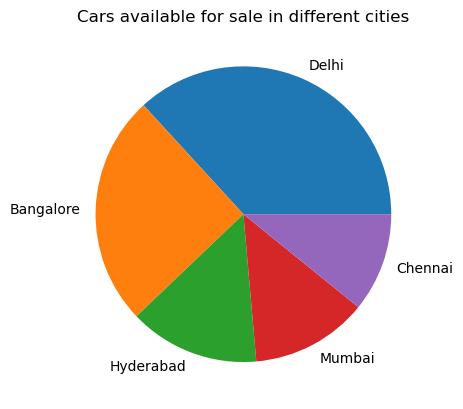

In [81]:
#Total number of cars in different cities 
val=df['City'].value_counts().values
lab=df['City'].value_counts().index
plt.pie(val,labels=lab,data=df)
plt.title('Cars available for sale in different cities')
plt.show()

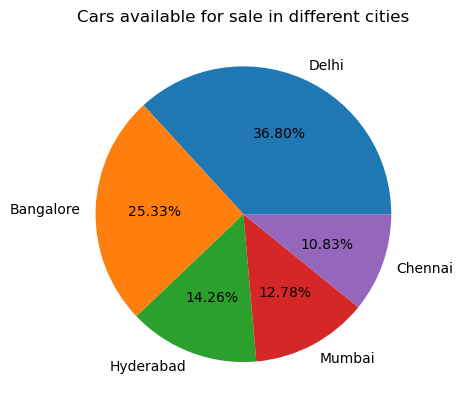

In [32]:
# Percentage of cars available for sale in different cities 
val=df['City'].value_counts().values
lab=df['City'].value_counts().index
plt.pie(val,labels=lab,data=df,autopct='%0.2f%%')
plt.title('Cars available for sale in different cities')
plt.show()

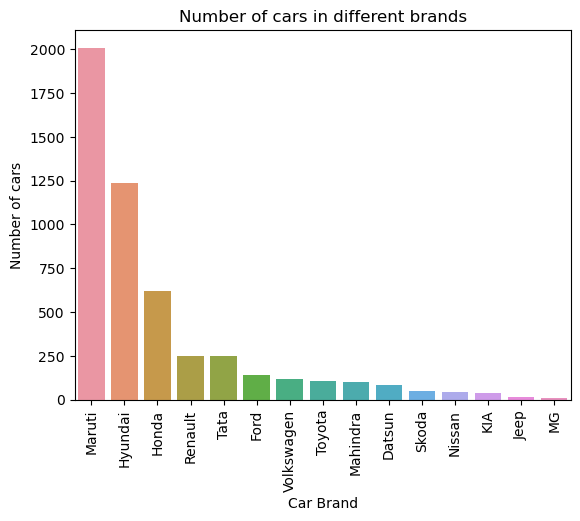

In [33]:
#No. of cars in different brands(overall)
brand=df['Car_brand'].value_counts().index
val=df['Car_brand'].value_counts().values
sns.barplot(x=brand,y=val,data=df_del)
plt.xticks(rotation=90)
plt.title('Number of cars in different brands')
plt.xlabel('Car Brand')
plt.ylabel('Number of cars')
plt.show()

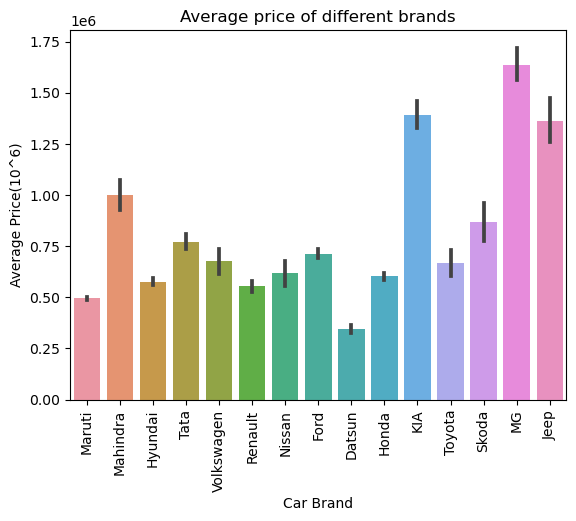

In [34]:
# Average price of all the brands 
sns.barplot(x='Car_brand',y='Price',data=df)#(By default it will average the values of price)
plt.xticks(rotation=90)
plt.title('Average price of different brands')
plt.xlabel('Car Brand')
plt.ylabel('Average Price(10^6)')
plt.show()

In [35]:
# Total number of different car brands in each city 
#(separate charts for each city)

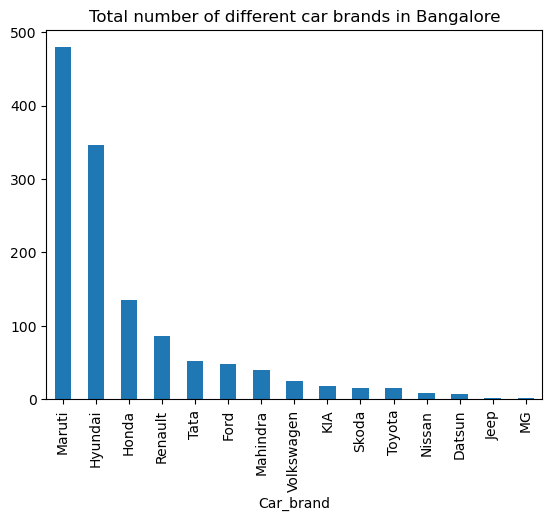

In [80]:
df[df['City']=='Bangalore'].value_counts('Car_brand').plot(kind='bar')
plt.title('Total number of different car brands in Bangalore')
plt.show()

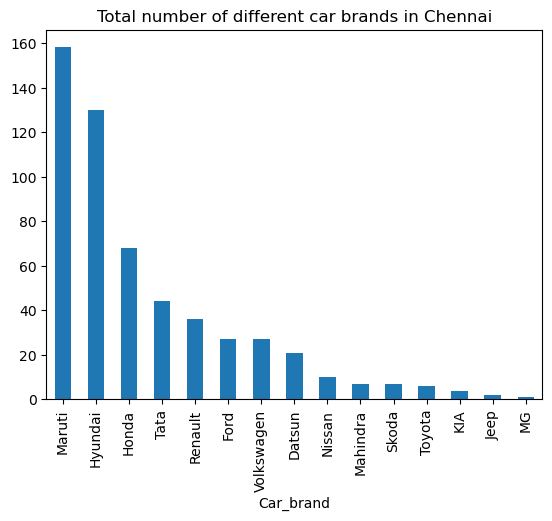

In [36]:
df[df['City']=='Chennai'].value_counts('Car_brand').plot(kind='bar')
plt.title('Total number of different car brands in Chennai')
plt.show()

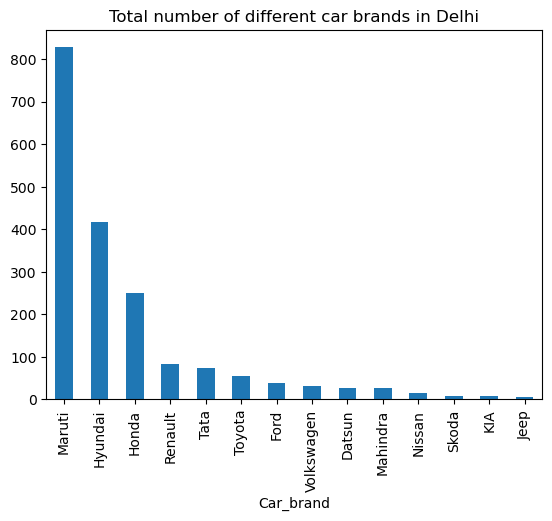

In [37]:
df[df['City']=='Delhi'].value_counts('Car_brand').plot(kind='bar')
plt.title('Total number of different car brands in Delhi')
plt.show()

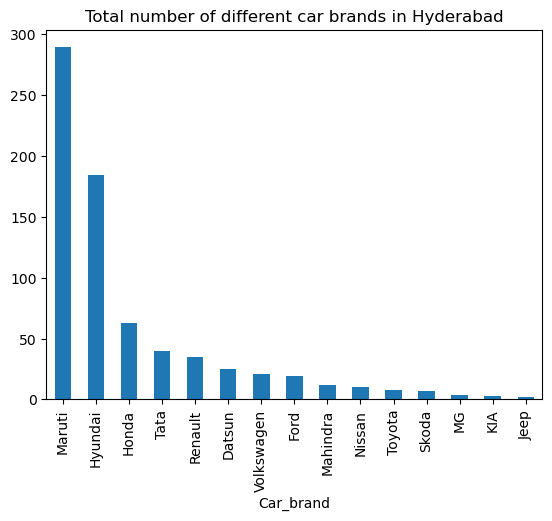

In [38]:
df[df['City']=='Hyderabad'].value_counts('Car_brand').plot(kind='bar')
plt.title('Total number of different car brands in Hyderabad')
plt.show()

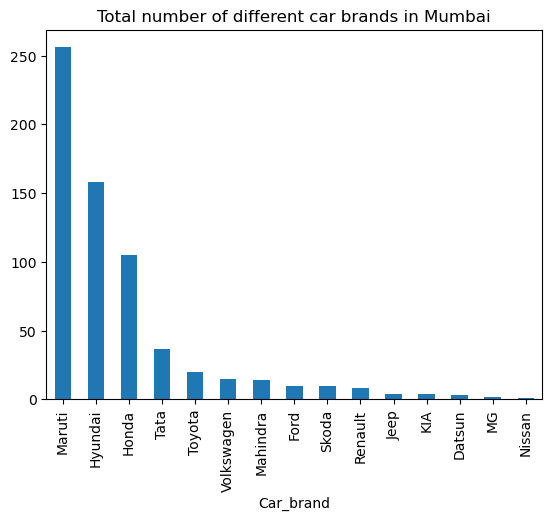

In [39]:
df[df['City']=='Mumbai'].value_counts('Car_brand').plot(kind='bar')
plt.title('Total number of different car brands in Mumbai')
plt.show()

[]

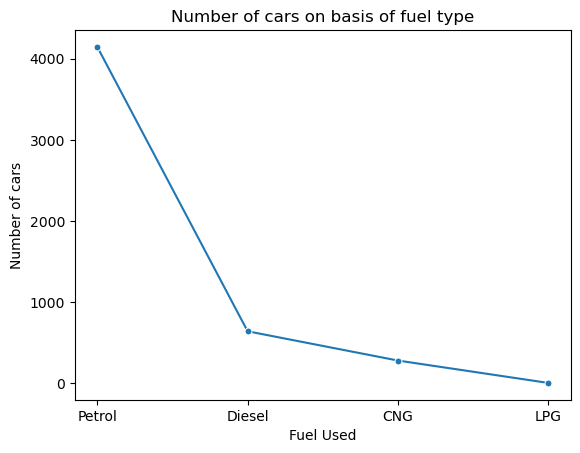

In [40]:
#Number of cars based on fuel type(overall)
val=df['Fuel type'].value_counts().values  
lab=df['Fuel type'].value_counts().index
#plt.lineplot(val,labels=lab,data=df)
sns.lineplot(x=lab,y=val,marker='o',markersize=5)
plt.title('Number of cars on basis of fuel type')
plt.xlabel('Fuel Used')
plt.ylabel('Number of cars')
plt.plot()

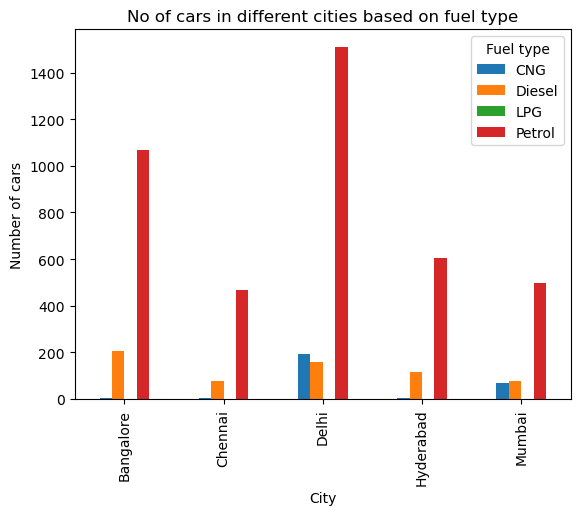

In [41]:
#7 No of cars in different cities based on fuel type
piv1=df.pivot_table(index='City',columns='Fuel type',aggfunc='count',values='Car Model')
piv1.plot(kind='bar')
plt.title('No of cars in different cities based on fuel type')
plt.xlabel('City')
plt.ylabel('Number of cars')
plt.plot()
plt.show()

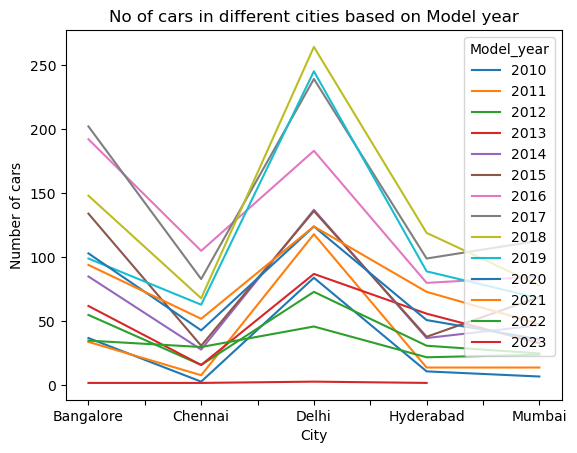

In [42]:
#No. of Cars in different cities based on Model year
piv2=df.pivot_table(index='City',columns='Model_year',aggfunc='count',values='Car Model')
piv2.plot(kind='line')
plt.title('No of cars in different cities based on Model year')
plt.xlabel('City')
plt.ylabel('Number of cars')
plt.show()

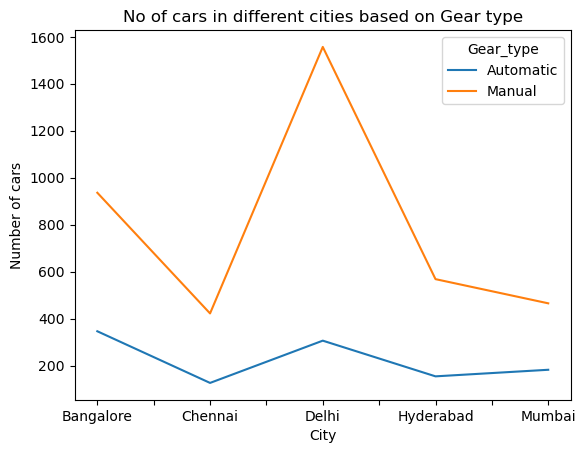

In [43]:
#No. of Cars in different cities based on Gear type
piv3=df.pivot_table(index='City',columns='Gear_type',aggfunc='count',values='Car Model')
piv3.plot(kind='line')
plt.title('No of cars in different cities based on Gear type')
plt.xlabel('City')
plt.ylabel('Number of cars')
plt.show()

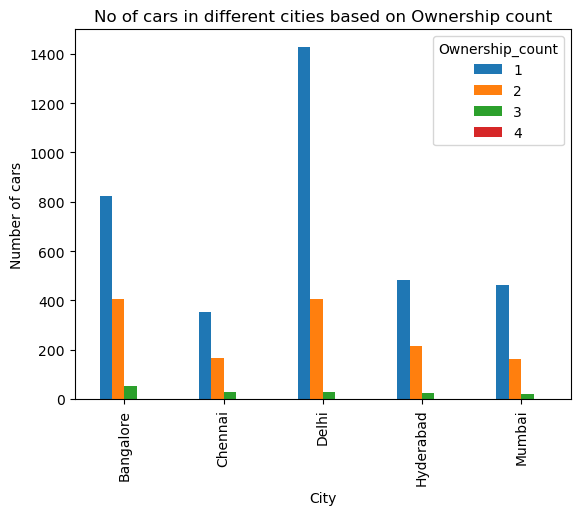

In [44]:
#No. of Cars in different cities based on Ownership
piv4=df.pivot_table(index='City',columns='Ownership_count',aggfunc='count',values='Car Model')
piv4.plot(kind='bar')
plt.title('No of cars in different cities based on Ownership count')
plt.xlabel('City')
plt.ylabel('Number of cars')
plt.show()

C:\Users\komal\AppData\Local\Temp\ipykernel_14312\1250841320.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_fuel=df[df['City']=='Bangalore'].groupby('Fuel type').mean()


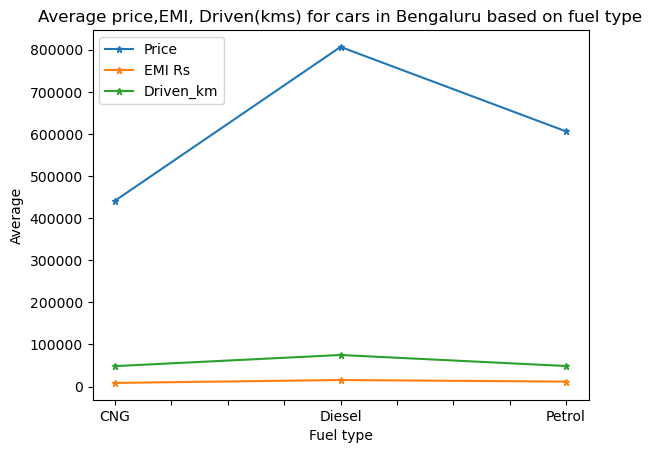

In [55]:
#Average Price, EMI, Driven(Kms) based on Fuel type (For each city separately) 
df_fuel=df[df['City']=='Bangalore'].groupby('Fuel type').mean()
df_fuel[['Price','EMI Rs','Driven_km']].plot(kind='line',marker='*',markersize=5)
plt.title('Average price,EMI, Driven(kms) for cars in Bengaluru based on fuel type')
plt.xlabel('Fuel type')
plt.ylabel('Average')
plt.show()

C:\Users\komal\AppData\Local\Temp\ipykernel_14312\535333456.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_fuel=df[df['City']=='Chennai'].groupby('Fuel type').mean()


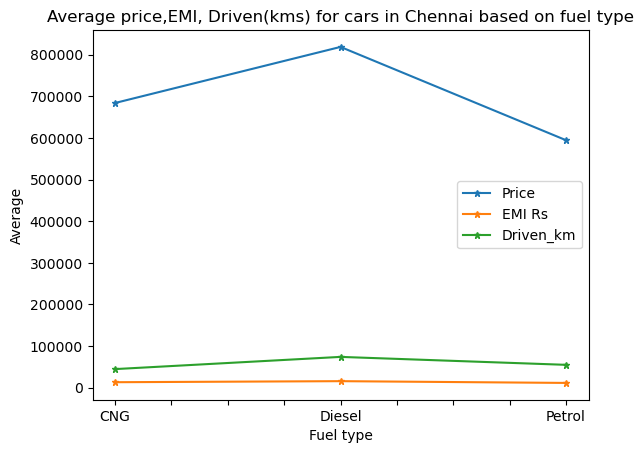

In [47]:
df_fuel=df[df['City']=='Chennai'].groupby('Fuel type').mean()
df_fuel[['Price','EMI Rs','Driven_km']].plot(kind='line',marker='*',markersize=5)
plt.title('Average price,EMI, Driven(kms) for cars in Chennai based on fuel type')
plt.xlabel('Fuel type')
plt.ylabel('Average')
plt.show()

C:\Users\komal\AppData\Local\Temp\ipykernel_14312\2011167145.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_fuel=df[df['City']=='Delhi'].groupby('Fuel type').mean()


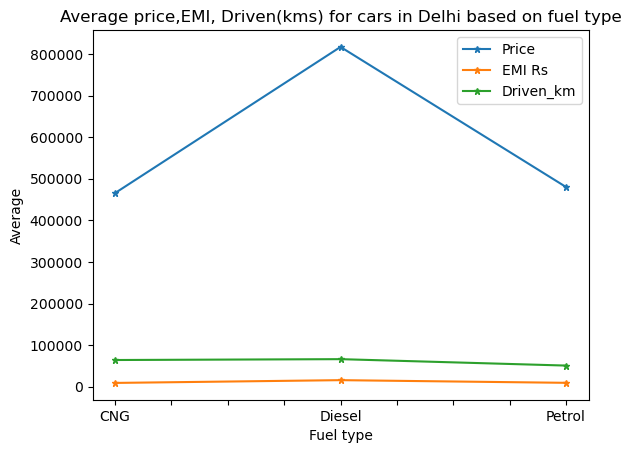

In [48]:
df_fuel=df[df['City']=='Delhi'].groupby('Fuel type').mean()
df_fuel[['Price','EMI Rs','Driven_km']].plot(kind='line',marker='*',markersize=5)
plt.title('Average price,EMI, Driven(kms) for cars in Delhi based on fuel type')
plt.xlabel('Fuel type')
plt.ylabel('Average')
plt.show()

C:\Users\komal\AppData\Local\Temp\ipykernel_14312\834093057.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_fuel=df[df['City']=='Hyderabad'].groupby('Fuel type').mean()


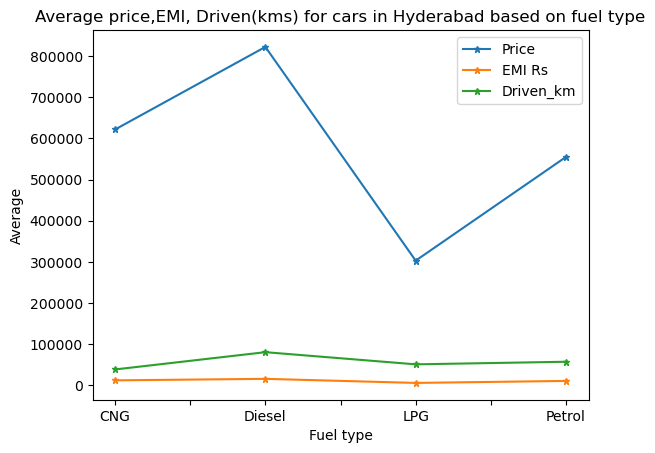

In [49]:
df_fuel=df[df['City']=='Hyderabad'].groupby('Fuel type').mean()
df_fuel[['Price','EMI Rs','Driven_km']].plot(kind='line',marker='*',markersize=5)
plt.title('Average price,EMI, Driven(kms) for cars in Hyderabad based on fuel type')
plt.xlabel('Fuel type')
plt.ylabel('Average')
plt.show()

C:\Users\komal\AppData\Local\Temp\ipykernel_14312\26786580.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_fuel=df[df['City']=='Mumbai'].groupby('Fuel type').mean()


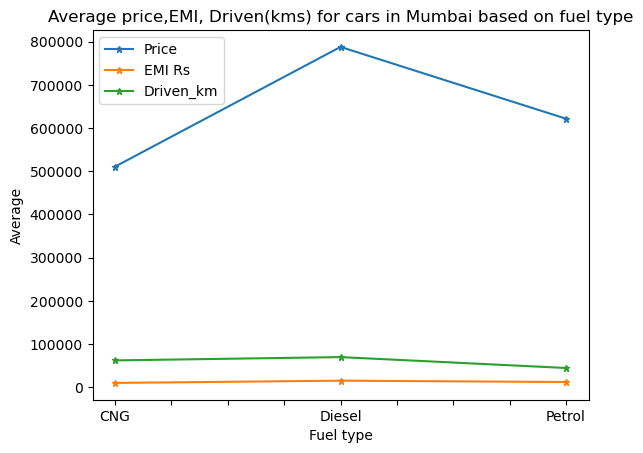

In [50]:
df_fuel=df[df['City']=='Mumbai'].groupby('Fuel type').mean()
df_fuel[['Price','EMI Rs','Driven_km']].plot(kind='line',marker='*',markersize=5)
plt.title('Average price,EMI, Driven(kms) for cars in Mumbai based on fuel type')
plt.xlabel('Fuel type')
plt.ylabel('Average')
plt.show()

In [70]:
# Details of highest priced cars 
df[df['Price']==max(df['Price'])]

,Unnamed: 0,Car Model,Gear_type,Driven_km,Fuel type,Reg_place,Price,Car Location,City,Car_brand,Model_year,Ownership_count,EMI Rs
1166,1166,XZA PLUS GOLD,Automatic,48686,Diesel,KA-48,2212000,"Garuda Mall, Magrath Road, Bengaluru",Bangalore,Tata,2022,1,42103


In [71]:
#Details of lowest priced cars 
df[df['Price']==min(df['Price'])]

,Unnamed: 0,Car Model,Gear_type,Driven_km,Fuel type,Reg_place,Price,Car Location,City,Car_brand,Model_year,Ownership_count,EMI Rs
1659,1659,LXI,Manual,49984,Petrol,UP-14,121000,"GIP Mall, Noida",Delhi,Maruti,2010,1,2366


# Details of lowest priced cars in each city 

In [54]:
df_new=df[df['City']=='Bangalore']
df_new[df_new['Price']==min(df_new['Price'])]

,Unnamed: 0,Car Model,Gear_type,Driven_km,Fuel type,Reg_place,Price,Car Location,City,Car_brand,Model_year,Ownership_count,EMI Rs
1068,1068,ERA +,Manual,47816,Petrol,KA-09,214000,"Horamavu Agara Road, Bengaluru",Bangalore,Hyundai,2012,2,4184


In [56]:
df_new=df[df['City']=='Chennai']
df_new[df_new['Price']==min(df_new['Price'])]

,Unnamed: 0,Car Model,Gear_type,Driven_km,Fuel type,Reg_place,Price,Car Location,City,Car_brand,Model_year,Ownership_count,EMI Rs
432,432,VXI,Manual,92400,Petrol,TN-10,193000,Navalur\n,Chennai,Maruti,2010,3,3773


In [58]:
df_new=df[df['City']=='Delhi']
df_new[df_new['Price']==min(df_new['Price'])]

,Unnamed: 0,Car Model,Gear_type,Driven_km,Fuel type,Reg_place,Price,Car Location,City,Car_brand,Model_year,Ownership_count,EMI Rs
1659,1659,LXI,Manual,49984,Petrol,UP-14,121000,"GIP Mall, Noida",Delhi,Maruti,2010,1,2366


In [59]:
df_new=df[df['City']=='Hyderabad']
df_new[df_new['Price']==min(df_new['Price'])]

,Unnamed: 0,Car Model,Gear_type,Driven_km,Fuel type,Reg_place,Price,Car Location,City,Car_brand,Model_year,Ownership_count,EMI Rs
532,532,GL,Manual,81753,Petrol,AP-13,176000,"Attapur, Hyderabad",Hyderabad,Hyundai,2010,1,3441


In [60]:
df_new=df[df['City']=='Mumbai']
df_new[df_new['Price']==min(df_new['Price'])]

,Unnamed: 0,Car Model,Gear_type,Driven_km,Fuel type,Reg_place,Price,Car Location,City,Car_brand,Model_year,Ownership_count,EMI Rs
564,564,LXI,Manual,51078,Petrol,MH-03,223000,"Goregaon, Mumbai",Mumbai,Maruti,2011,1,4360


# Details of highest priced cars in each city

In [62]:
df_new=df[df['City']=='Bangalore']
df_new[df_new['Price']==max(df_new['Price'])]

,Unnamed: 0,Car Model,Gear_type,Driven_km,Fuel type,Reg_place,Price,Car Location,City,Car_brand,Model_year,Ownership_count,EMI Rs
1166,1166,XZA PLUS GOLD,Automatic,48686,Diesel,KA-48,2212000,"Garuda Mall, Magrath Road, Bengaluru",Bangalore,Tata,2022,1,42103


In [63]:
df_new=df[df['City']=='Chennai']
df_new[df_new['Price']==max(df_new['Price'])]

,Unnamed: 0,Car Model,Gear_type,Driven_km,Fuel type,Reg_place,Price,Car Location,City,Car_brand,Model_year,Ownership_count,EMI Rs
199,199,PLATINUM 1.5 MT 7STR,Manual,3938,Diesel,TN-05,2033000,Navalur\n,Chennai,Hyundai,2022,1,38696


In [65]:
df_new=df[df['City']=='Delhi']
df_new[df_new['Price']==max(df_new['Price'])]

,Unnamed: 0,Car Model,Gear_type,Driven_km,Fuel type,Reg_place,Price,Car Location,City,Car_brand,Model_year,Ownership_count,EMI Rs
1584,1584,2.8 ZX AT 7 STR,Automatic,22655,Diesel,UP-70,2010000,"Sector-18, Noida",Delhi,Toyota,2019,1,38258


In [67]:
df_new=df[df['City']=='Hyderabad']
df_new[df_new['Price']==max(df_new['Price'])]

,Unnamed: 0,Car Model,Gear_type,Driven_km,Fuel type,Reg_place,Price,Car Location,City,Car_brand,Model_year,Ownership_count,EMI Rs
613,613,1.5 SIGNATURE (O) AT 6STR,Automatic,29261,Diesel,TS-11,1965000,"Bachupally, Hyderabad",Hyderabad,Hyundai,2021,1,37402


In [68]:
df_new=df[df['City']=='Mumbai']
df_new[df_new['Price']==max(df_new['Price'])]

,Unnamed: 0,Car Model,Gear_type,Driven_km,Fuel type,Reg_place,Price,Car Location,City,Car_brand,Model_year,Ownership_count,EMI Rs
574,574,PLATINUM 1.5 MT 7STR,Manual,23155,Diesel,MH-04,1756000,"Goregaon, Mumbai",Mumbai,Hyundai,2021,1,33424


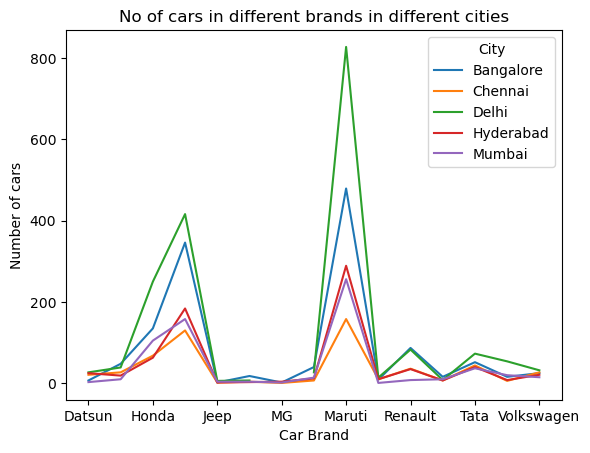

In [72]:
#No. of cars in different Brands in different cities 
piv_tab=df.pivot_table(index='Car_brand',columns='City',aggfunc='count',values='Car Model')
piv_tab.plot(kind='line')
plt.title('No of cars in different brands in different cities')
plt.xlabel('Car Brand')
plt.ylabel('Number of cars')
plt.show()

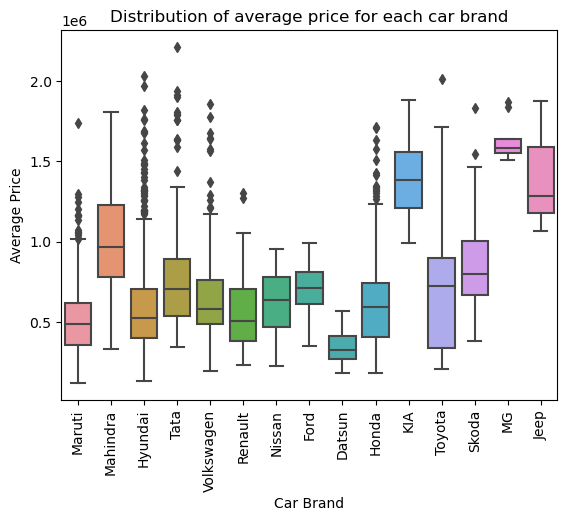

In [73]:
#Distribution of average price for each car brand 
sns.boxplot(x='Car_brand',y='Price',data=df)
plt.xticks(rotation=90)
plt.title('Distribution of average price for each car brand')
plt.xlabel('Car Brand')
plt.ylabel('Average Price')
plt.show()

In [74]:
df['Model_year']=df['Model_year'].astype('int')
df['Ownership_count']=df['Ownership_count'].astype('int')

In [75]:
#Correlation between the variables – Price, model_year, Driven_km, ownership_count, EMI_Rs 
df.corr()
corr=df[['Price','Model_year','Driven_km','Ownership_count','EMI Rs']].corr()
corr

C:\Users\komal\AppData\Local\Temp\ipykernel_14312\2948569111.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,Price,Model_year,Driven_km,Ownership_count,EMI Rs
Price,1.000000,0.618460,-0.211153,-0.138363,0.999750
Model_year,0.618460,1.000000,-0.423224,-0.207472,0.623266
Driven_km,-0.211153,-0.423224,1.000000,0.134329,-0.211744
Ownership_count,-0.138363,-0.207472,0.134329,1.000000,-0.138869
EMI Rs,0.999750,0.623266,-0.211744,-0.138869,1.000000


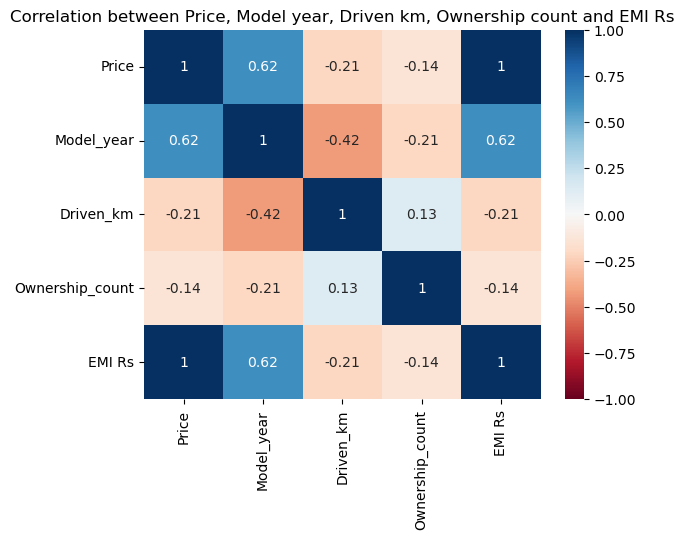

In [76]:
sns.heatmap(corr,cmap='RdBu',vmin=-1,vmax=1,annot=True)
plt.title('Correlation between Price, Model year, Driven km, Ownership count and EMI Rs')
plt.show()

In [83]:
# Top 5 reg places by car count 
p=df.pivot_table(index='Reg_place',values=['Car Model','Car_brand'],aggfunc='count')
p['Car Model'].nlargest(5)

Reg_place
HR-26    276
KA-03    211
KA-05    190
TS-07    166
DL-8C    158
Name: Car Model, dtype: int64

In [77]:
#Top 5 brands by average price of the cars 
p=df.pivot_table(index='Car_brand',values='Price',aggfunc='mean')
top5=p['Price'].nlargest(5)

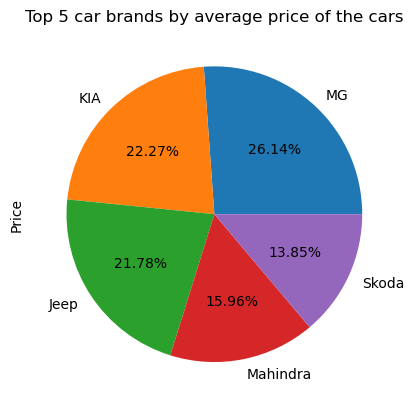

In [78]:
top5.plot(kind='pie',autopct='%0.2f%%')
plt.title('Top 5 car brands by average price of the cars')
plt.show()